In [ ]:
Case Study

Objective:
    
• Practice Naive Bayes algorithm based classification.
• Identify the predictors that can be of influence by experiment.

Questions:
    
1.Load the kinematics dataset as measured on mobile sensors from the file “run_or_walk.csv”. 
List out the columns in the dataset.
2. Let the target variable ‘y’ be the activity and assign all the columns after it to ‘x’.

3.Using Scikit-learn fit a Gaussian Naive Bayes model and observe the accuracy. Generate a classification 
report using scikit learn.

4.Repeat the model once using only the acceleration values as predictors 
and then using only the gyro values as predictors. 
Comment on the difference in accuracy between both the models.
 

In [2]:
'''
    
1.Load the kinematics dataset as measured on mobile sensors from the file “run_or_walk.csv”. 
List out the columns in the dataset.

'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data='/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_9_Supervised_Learning-II/run_or_walk.csv'

df=pd.read_csv(data)

df.head(7)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
5,2017-6-30,13:51:17:46806991,viktor,0,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750
6,2017-6-30,13:51:17:246767997,viktor,0,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473


In [3]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [4]:
df.keys()

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [10]:
#2. Let the target variable ‘y’ be the activity and assign all the columns after it to ‘x’.


X=df.iloc[:,5:11]

Y=df['activity']

X.head(5)

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [12]:
Y.head(7)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: activity, dtype: int64

In [13]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [14]:
# Find missing values
print('Missing values:\n{}'.format(df.isnull().sum()))

# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

# Find the unique values of 'diagnosis'.
print('\nUnique values of "diagnosis": {}'.format(df['activity'].unique()))

Missing values:
date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

Number of duplicated records: 0

Unique values of "diagnosis": [0 1]


In [15]:
df.shape

(88588, 11)

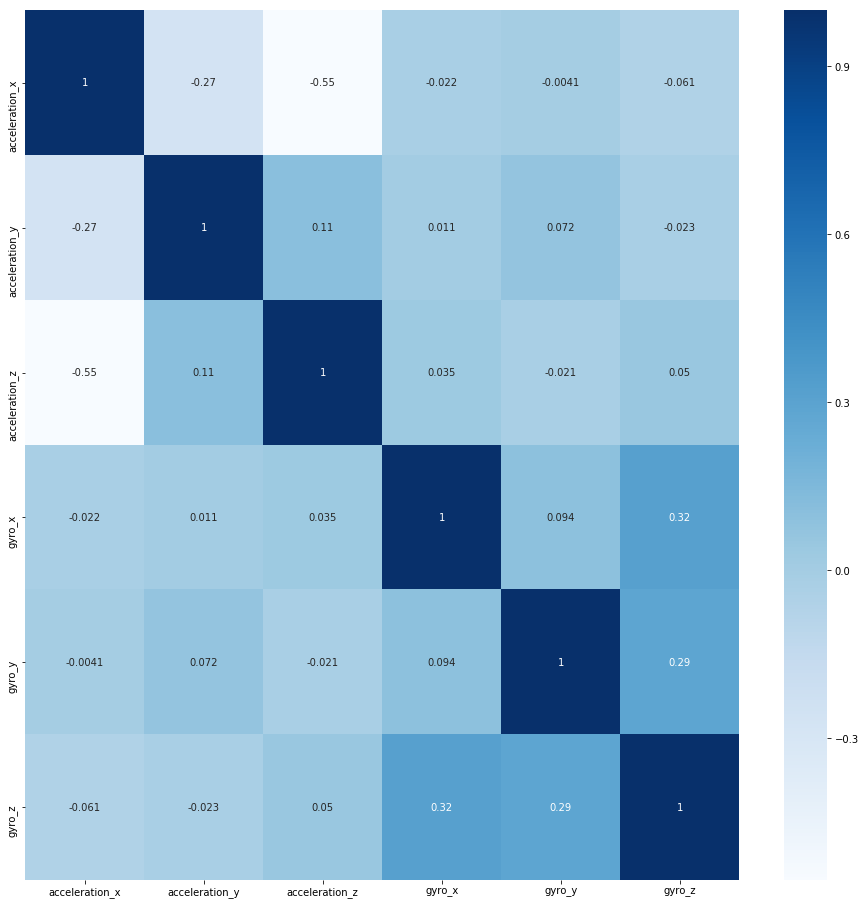

In [16]:
#finding correlation

import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.iloc[:, 5:11].corr()
plt.figure(figsize=(16,16))
sns.heatmap(df_corr, cmap="Blues", annot=True)
plt.show()

In [17]:
#splitting data into test and train

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(X,Y, test_size=0.3,random_state=10)

In [19]:
#3.Using Scikit-learn fit a Gaussian Naive Bayes model and observe the accuracy. Generate a classification 
#report using scikit learn.

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb =GaussianNB()

gnb.fit(x_train,y_train)

y_pred=gnb.predict(x_test)


metrics.accuracy_score(y_pred, y_test)



0.9580840576438274

In [20]:
# print(metrics.classification_report(expected, predicted))

print(metrics.classification_report(y_test, y_pred))



             precision    recall  f1-score   support

          0       0.93      0.99      0.96     13253
          1       0.99      0.93      0.96     13324

avg / total       0.96      0.96      0.96     26577



In [ ]:
#4.Repeat the model once using only the acceleration values as predictors 
#and then using only the gyro values as predictors. 
#Comment on the difference in accuracy between both the models.
 

In [21]:
df.head(7)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
5,2017-6-30,13:51:17:46806991,viktor,0,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750
6,2017-6-30,13:51:17:246767997,viktor,0,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473


In [22]:
X_new=df.iloc[:,5:8]

Y_new=df['activity']

X_new.head(7)

,acceleration_x,acceleration_y,acceleration_z
0,0.2650,-0.7814,-0.0076
1,0.6722,-1.1233,-0.2344
2,0.4399,-1.4817,0.0722
3,0.3031,-0.8125,0.0888
4,0.4814,-0.9312,0.0359
5,0.4044,-0.8056,-0.0956
6,0.6320,-1.1290,-0.2982


In [26]:
#splitting data into test and train

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(X_new,Y_new, test_size=0.3,random_state=10)

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb =GaussianNB()

gnb.fit(x_train,y_train)

y_pred=gnb.predict(x_test)


metrics.accuracy_score(y_pred, y_test)



0.958648455431388

In [28]:
# print(metrics.classification_report(expected, predicted))

print(metrics.classification_report(y_test, y_pred))



             precision    recall  f1-score   support

          0       0.93      0.99      0.96     13253
          1       0.99      0.92      0.96     13324

avg / total       0.96      0.96      0.96     26577



In [29]:
df.head(7)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
5,2017-6-30,13:51:17:46806991,viktor,0,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750
6,2017-6-30,13:51:17:246767997,viktor,0,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473


In [30]:
X_new2=df.iloc[:,8:11]

Y_new2=df['activity']

X_new2.head(7)

,gyro_x,gyro_y,gyro_z
0,-0.0590,0.0325,-2.9296
1,-0.1757,0.0208,0.1269
2,-0.9105,0.1063,-2.4367
3,0.1199,-0.4099,-2.9336
4,0.0527,0.4379,2.4922
5,0.6925,-0.2179,2.5750
6,0.0548,-0.1896,0.4473


In [31]:
#splitting data into test and train

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(X_new2,Y_new2, test_size=0.3,random_state=10)

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb =GaussianNB()

gnb.fit(x_train,y_train)

y_pred=gnb.predict(x_test)


metrics.accuracy_score(y_pred, y_test)


0.6486811905030666

In [33]:
# print(metrics.classification_report(expected, predicted))

print(metrics.classification_report(y_test, y_pred))



             precision    recall  f1-score   support

          0       0.62      0.74      0.68     13253
          1       0.69      0.55      0.61     13324

avg / total       0.65      0.65      0.65     26577



In [ ]:
#comment: Using model on just gyro columns reduced teh accuracy by 31%